## Trading Strategies

## Simple Moving Average

In [17]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [33]:
import pandas_datareader.data as web
data = web.DataReader('WIPRO.NS', 'yahoo', '2016-01-01','2022-09-30')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1668 entries, 2016-01-01 to 2022-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1668 non-null   float64
 1   Low        1668 non-null   float64
 2   Open       1668 non-null   float64
 3   Close      1668 non-null   float64
 4   Volume     1668 non-null   float64
 5   Adj Close  1668 non-null   float64
dtypes: float64(6)
memory usage: 91.2 KB


SMA1 = 42
SMA2 = 252

data['SMA1'] = data['Close'].rolling(SAM1).mean()
data['SMA2'] = data['Close'].rolling(SAM2).mean()

data.plot(figsize(10,6))




<AxesSubplot:xlabel='Date'>

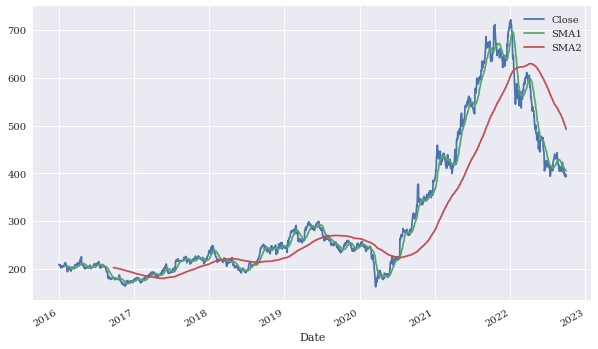

In [20]:
SMA1 = 20
SMA2 = 180

data['SMA1'] = data['Close'].rolling(SMA1).mean()
data['SMA2'] = data['Close'].rolling(SMA2).mean()

data[['Close','SMA1','SMA2']].plot(figsize=(10,6))

In [21]:
data['Position'] = np.where(data['SMA1']> data['SMA2'], 1, -1)
data

,High,Low,Open,Close,Volume,Adj Close,SMA1,SMA2,Position
Date,,,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972626,NaN,NaN,-1
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424088,NaN,NaN,-1
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135132,NaN,NaN,-1
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485062,NaN,NaN,-1
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588882,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2022-09-26,399.200012,384.600006,392.000000,394.799988,9497072.0,394.799988,407.787500,499.316667,-1
2022-09-27,401.399994,392.000000,396.799988,398.399994,6227347.0,398.399994,407.489999,497.566112,-1
2022-09-28,400.500000,395.350006,396.000000,398.049988,4460795.0,398.049988,406.714999,495.856667,-1


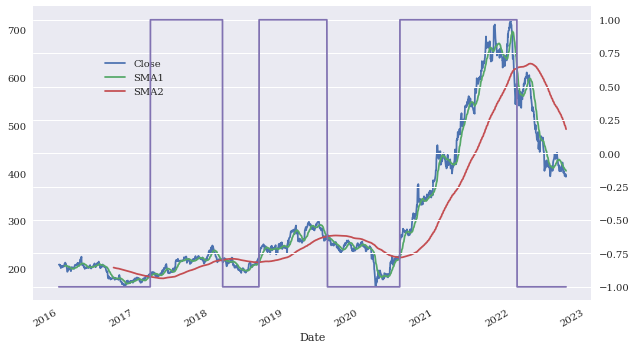

In [22]:
ax = data[['Close','SMA1','SMA2', 'Position']].plot(secondary_y = 'Position', figsize=(10,6))
ax.legend().set_bbox_to_anchor((0.25,0.85))

In [23]:
data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data['Strategy']  = data['Position'].shift(1)*data['Returns']

In [32]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,,,,,,


In [25]:
np.exp(data[['Returns','Strategy']].sum())

Returns     1.889358
Strategy    4.427796
dtype: float64

In [26]:
data[['Returns', 'Strategy']].std()*252**0.5

Returns     0.263268
Strategy    0.262956
dtype: float64

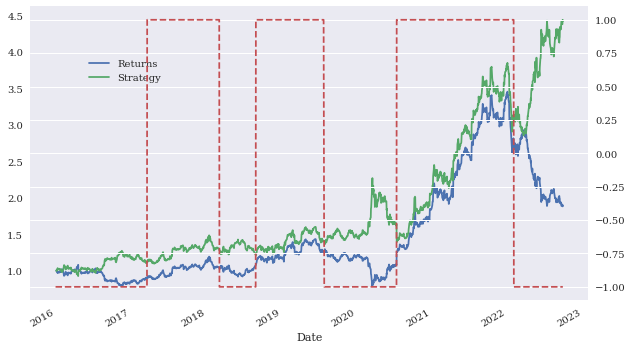

In [27]:
ax = data[['Returns', 'Strategy']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [28]:
from itertools import product
sma1 = range(20, 61, 4) 
sma2 = range(180, 281, 10) 

results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2): 
    data = pd.DataFrame(data)
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data['SMA1'] = data['Close'].rolling(SMA1).mean()
    data['SMA2'] = data['Close'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
    {'SMA1': SMA1, 'SMA2': SMA2,
   'MARKET': perf['Returns'],
 'STRATEGY': perf['Strategy'],
 'OUT': perf['Strategy'] - perf['Returns']},
 index=[0]), ignore_index=True)

C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipy

C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipy

C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_11088\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipy

In [29]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [30]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
0,20,180,2.015206,3.792558,1.777352
2,20,200,1.599229,3.275526,1.676297
1,20,190,1.780412,3.268135,1.487723
3,20,210,1.659651,2.855529,1.195878
4,20,220,1.048677,2.220201,1.171524
5,20,230,0.590327,1.197213,0.606886
6,20,240,0.972256,1.028535,0.056279


In [34]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972641
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424103
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485031
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913


In [36]:
lags = 5
cols = []
for lag in range(1, lags +1):
    col = f'lag_{lag}'
    data[col] = data['Close'].shift(lag)
    cols.append(col)

In [37]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972641,NaN,NaN,NaN,NaN,NaN
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424103,208.668808,NaN,NaN,NaN,NaN
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147,209.137558,208.668808,NaN,NaN,NaN
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485031,208.837555,209.137558,208.668808,NaN,NaN
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913,208.162552,208.837555,209.137558,208.668808,NaN


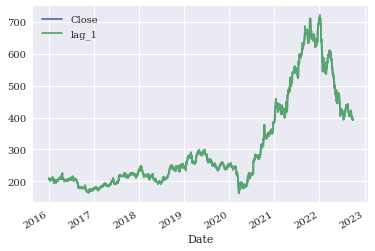

In [41]:
data[['Close','lag_1']].plot();

In [42]:
data

,High,Low,Open,Close,Volume,Adj Close,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972641,NaN,NaN,NaN,NaN,NaN
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424103,208.668808,NaN,NaN,NaN,NaN
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147,209.137558,208.668808,NaN,NaN,NaN
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485031,208.837555,209.137558,208.668808,NaN,NaN
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913,208.162552,208.837555,209.137558,208.668808,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,399.200012,384.600006,392.000000,394.799988,9497072.0,394.799988,394.350006,397.950012,400.750000,404.899994,401.950012
2022-09-27,401.399994,392.000000,396.799988,398.399994,6227347.0,398.399994,394.799988,394.350006,397.950012,400.750000,404.899994
2022-09-28,400.500000,395.350006,396.000000,398.049988,4460795.0,398.049988,398.399994,394.799988,394.350006,397.950012,400.750000


In [49]:
data['returns'] = np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)

<AxesSubplot:>

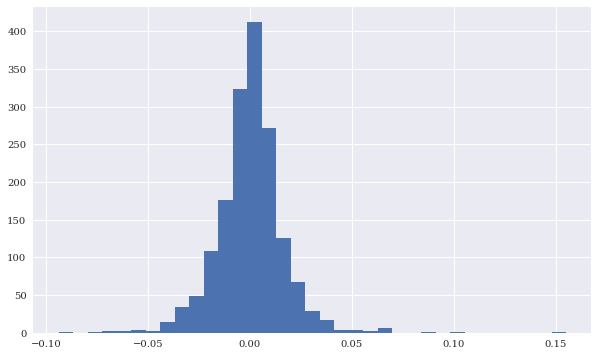

In [50]:
data['returns'].hist(bins=35, figsize=(10,6))

In [51]:
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1,lags+1):
        col = f'lag_{lag}'
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [53]:
create_lags(data)

In [54]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,lag_1,lag_2,lag_3,lag_4,lag_5,retuens,returns,direction
Date,,,,,,,,,,,,,,
2016-01-11,207.731308,200.400055,207.000046,201.543793,4977092.0,194.110382,NaN,NaN,208.162552,208.837555,209.137558,-0.033573,-0.033573,-1
2016-01-12,206.625046,199.200043,201.187546,205.837555,3491084.0,198.245804,-0.033573,NaN,206.193802,208.162552,208.837555,0.021081,0.021081,1
2016-01-13,206.962555,202.668793,205.125046,204.937546,1793783.0,197.378998,0.021081,-0.033573,208.425049,206.193802,208.162552,-0.004382,-0.004382,-1
2016-01-14,206.212555,201.000046,204.375046,204.468796,2919332.0,196.927505,-0.004382,0.021081,201.543793,208.425049,206.193802,-0.002290,-0.002290,-1
2016-01-15,205.818802,201.375046,204.975052,203.662552,1667087.0,196.151016,-0.002290,-0.004382,205.837555,201.543793,208.425049,-0.003951,-0.003951,-1


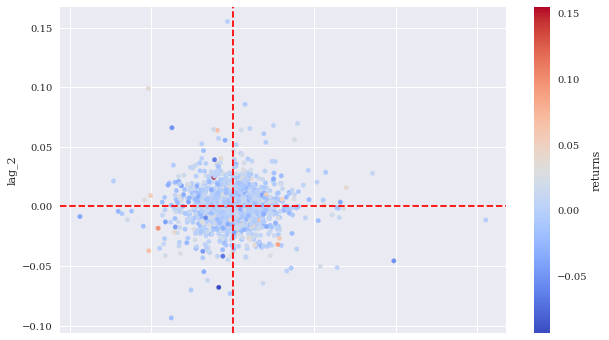

In [56]:
data.plot.scatter(x= 'lag_1', y = 'lag_2', c= 'returns',cmap='coolwarm', 
                  figsize=(10,6), colorbar= True)
plt.axvline(0,c='r', ls ='--')
plt.axhline(0,c='r', ls ='--')

## Regression

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
data.dropna(inplace=True)
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])


In [60]:
data[['pos_ols_1','pos_ols_2']]

,pos_ols_1,pos_ols_2
Date,,
2016-01-13,-0.000298,0.037046
2016-01-14,0.000780,0.050108
2016-01-15,0.000317,0.039209
2016-01-18,0.000362,0.039371
2016-01-19,0.000285,0.044199
...,...,...
2022-09-26,0.000298,0.034629
2022-09-27,0.000220,0.038695
2022-09-28,0.000369,0.047396


In [61]:
data[['pos_ols_1','pos_ols_2']] = np.where(data[['pos_ols_1','pos_ols_2']]>0,1,-1)

In [66]:
data['pos_ols_1'].value_counts()

 1    1537
-1     123
Name: pos_ols_1, dtype: int64

In [67]:
data['pos_ols_2'].value_counts()

 1    1656
-1       4
Name: pos_ols_2, dtype: int64

In [71]:
(data['pos_ols_1'].diff() != 0).sum(), (data['pos_ols_2'].diff() != 0).sum()

(222, 7)

In [73]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']


In [77]:
data[['returns','strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        1.915345
strat_ols_1    1.195463
strat_ols_2    1.906822
dtype: float64

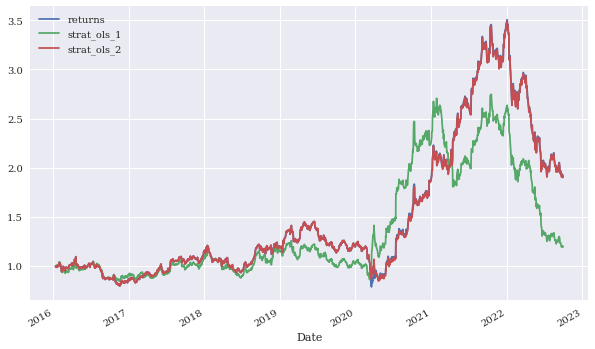

In [80]:
data[['returns','strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6));

## Clustering

In [90]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(data[cols])

KMeans(algorithm='auto', copy_x=True, init='K-mean++', max_iter=300, 
       n_clusters=2, n_init=10, 
 random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', init='K-mean++', n_clusters=2, random_state=0)

In [91]:
data['pos_clus'] = model.predict(data[cols])

In [92]:
data['pos_clus'] = np.where(data['pos_clus']==1, -1,1)

In [93]:
data['pos_clus'].values

array([-1,  1, -1, ..., -1,  1,  1])

In [95]:
plt.figure(figsize=(10,6));

<Figure size 720x432 with 0 Axes>

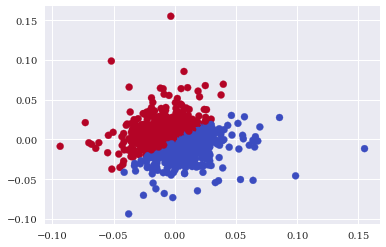

In [97]:
plt.scatter(data[cols].iloc[:,0],data[cols].iloc[:,1], 
           c=data['pos_clus'], cmap='coolwarm');

In [98]:
data['strat_clus'] = data['pos_clus'] * data['returns']

In [100]:
data[['returns','strat_clus']].sum().apply(np.exp)

returns       1.915345
strat_clus    1.195073
dtype: float64

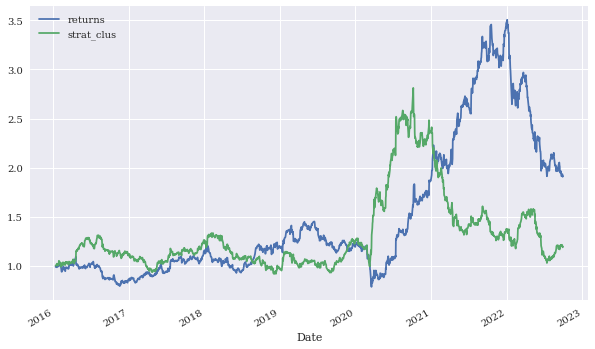

In [101]:
data[['returns','strat_clus']].cumsum().apply(np.exp).plot(figsize=(10,6));

## Frequency Approach

In [103]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins) 
        cols_bin.append(col_bin)


In [104]:
create_bins(data)

In [105]:
data[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
Date,,,
2016-01-13,1,0,-1
2016-01-14,0,1,-1
2016-01-15,0,0,-1
2016-01-18,0,0,1
2016-01-19,1,0,-1


In [106]:
data.groupby(cols_bin  + ['direction']).head()

,High,Low,Open,Close,Volume,Adj Close,lag_1,lag_2,lag_3,lag_4,...,returns,direction,pos_ols_1,pos_ols_2,strat_ols_1,strat_ols_2,pos_clus,strat_clus,lag_1_bin,lag_2_bin
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-13,206.962555,202.668793,205.125046,204.937546,1793783.0,197.378998,0.021081,-0.033573,208.425049,206.193802,...,-0.004382,-1,-1,1,0.004382,-0.004382,-1,0.004382,1,0
2016-01-14,206.212555,201.000046,204.375046,204.468796,2919332.0,196.927505,-0.004382,0.021081,201.543793,208.425049,...,-0.002290,-1,1,1,-0.002290,-0.002290,1,-0.002290,0,1
2016-01-15,205.818802,201.375046,204.975052,203.662552,1667087.0,196.151016,-0.002290,-0.004382,205.837555,201.543793,...,-0.003951,-1,1,1,-0.003951,-0.003951,-1,0.003951,0,0
2016-01-18,206.550049,199.031296,201.375046,205.181305,4515961.0,197.613739,-0.003951,-0.002290,204.937546,205.837555,...,0.007430,1,1,1,0.007430,0.007430,1,0.007430,0,0
2016-01-19,207.000046,201.750046,205.500046,203.250046,2553140.0,195.753708,0.007430,-0.003951,204.468796,204.937546,...,-0.009457,-1,1,1,-0.009457,-0.009457,-1,0.009457,1,0
2016-01-20,206.962555,199.950043,202.143799,203.456299,3119055.0,195.952362,-0.009457,0.007430,203.662552,204.468796,...,0.001014,1,1,1,0.001014,0.001014,1,0.001014,0,1
2016-01-21,208.125046,203.081299,203.081299,206.550049,4650132.0,198.931992,0.001014,-0.009457,205.181305,203.662552,...,0.015092,1,1,1,0.015092,0.015092,-1,-0.015092,1,0
2016-01-22,208.387558,205.162552,208.387558,206.287552,2222631.0,198.679214,0.015092,0.001014,203.250046,205.181305,...,-0.001272,-1,1,1,-0.001272,-0.001272,-1,0.001272,1,1
2016-01-25,206.175049,203.925049,205.462555,205.143799,2121412.0,199.389923,-0.001272,0.015092,203.456299,203.250046,...,-0.005560,-1,1,1,-0.005560,-0.005560,1,-0.005560,0,1


In [107]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           182
                       1           207
           1          -1           207
                       0             2
                       1           193
1          0          -1           173
                       0             3
                       1           226
           1          -1           229
                       0             2
                       1           236
dtype: int64

In [108]:
res = grouped['direction'].size().unstack(fill_value=0)

In [109]:
res

direction             -1   0    1
lag_1_bin lag_2_bin              
0         0          182   0  207
          1          207   2  193
1         0          173   3  226
          1          229   2  236

In [110]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max] 

In [111]:
res.style.apply(highlight_max, axis=1) 

In [112]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)

In [113]:
data['strat_freq'] = data['pos_freq'] * data['returns']

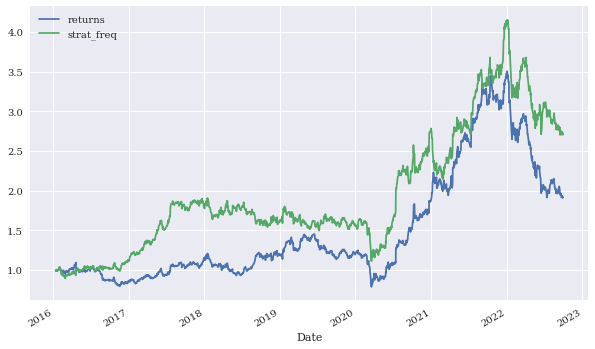

In [114]:
data[['returns', 'strat_freq']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6));


## Classification

In [ ]:
524